In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import DNN

Let's create a small dataset with samples from positive and negative classes.

In [2]:
N = 100
data1a = np.random.multivariate_normal(mean=[0, 0], cov=[[0.5, 0],[0, 0.5]], size=N)
data1b = np.random.multivariate_normal(mean=[2, 2], cov=[[0.5, 0],[0, 0.5]], size=N)
data2a = np.random.multivariate_normal(mean=[0, 2], cov=[[0.5, 0],[0, 0.5]], size=N)
data2b = np.random.multivariate_normal(mean=[2, 0], cov=[[0.5, 0],[0, 0.5]], size=N)

data = np.concatenate((data1a, data1b, data2a, data2b), axis=0)
# Arrays are explicitly defined as (N x 1) for convenience allowing generlizations to netowrks with multidimensional outputs
labels = np.concatenate((np.ones((2*N, 1)), np.zeros((2*N, 1))), axis=0)


Let's define a single layer network. A logistic regression classifier

In [43]:
my_net = DNN.Net()
my_net.addLayer(n_in=2, n_out=4, activation='relu')
my_net.addLayer(n_out=4, activation='relu')
my_net.addLayer(n_out=1, activation='sigmoid')
## define solver params for the trainer

solver_params = {'lr_rate': 0.01,  \
                 'momentum': 0.9,  \
                 'solver': 'sgd'}
my_solver = DNN.Solver(solver_params)
my_trainer = DNN.NetTrainer(net=my_net, \
                            loss_func='xent', \
                            batch_size=10,  \
                            max_iter=10000, \
                            train_data=data, \
                            label_data=labels, \
                            solver=my_solver, \
                            print_interval=1000)

In [44]:
print my_trainer.net.layers

[<DNN.Layer object at 0x7feaa0a5b990>, <DNN.Layer object at 0x7feaa0a5bf10>, <DNN.Layer object at 0x7feaa0a5bd90>]


In [45]:
my_trainer.max_iter

10000

In [46]:
my_trainer.train()

Iteration 0, objective = 0.745879
Iteration 1000, objective = 0.589737
Iteration 2000, objective = 0.424734
Iteration 3000, objective = 0.309328
Iteration 4000, objective = 0.279234
Iteration 5000, objective = 0.521163
Iteration 6000, objective = 0.282043
Iteration 7000, objective = 0.255461
Iteration 8000, objective = 0.208046
Iteration 9000, objective = 0.090224


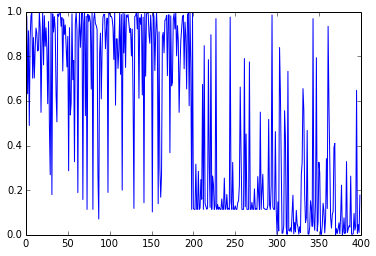

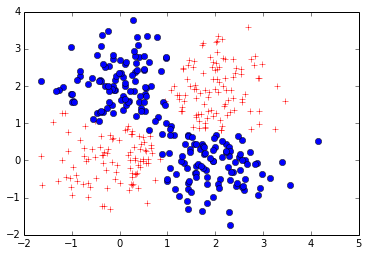

In [47]:
my_net.forward(data)
plt.plot(my_net.Xout)
plt.show()

pred_labels = np.reshape(my_net.Xout > 0.5, -1)
plt.plot(data[pred_labels, 0], data[pred_labels, 1], 'r+')
plt.hold
plt.plot(data[np.logical_not(pred_labels), 0], data[np.logical_not(pred_labels), 1], 'bo')
